In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import tools
import importlib
importlib.reload(tools)

<module 'tools' from '/home/eliska/evolution/code/tools.py'>

In [6]:
morphotopes = gpd.read_parquet('/data/uscuni-evolution/all_joined_fr.parquet')
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
483878_11_5,"MULTIPOLYGON (((3892732.777 2269790.62, 389273...",False,1,1,1,1,2,4,6,83,...,0.507157,0.901393,0.431894,28.997739,3.457417,3.457417,88.634839,94.169161,1.0,9739.330948
483878_11_7,"MULTIPOLYGON (((3893221.499 2270654.857, 38932...",False,2,4,7,12,18,41,76,49,...,0.393028,0.826700,0.294159,34.920752,2.997175,2.997175,37.757262,55.333813,1.0,4035.617791
483878_11_8,"MULTIPOLYGON (((3893095.385 2270658.299, 38930...",False,2,4,7,12,18,41,76,129,...,0.624465,0.754920,0.463325,21.349775,2.450073,2.450073,31.918897,39.710241,1.0,4982.620881
483878_11_1,"MULTIPOLYGON (((3893363.223 2271108.051, 38933...",False,1,1,2,3,4,8,15,53,...,0.664117,0.998579,0.535040,18.377784,2.623197,2.623197,58.638190,312.830201,0.0,22181.556838
483878_11_3,"MULTIPOLYGON (((3893704.281 2271201.893, 38937...",False,2,4,8,17,24,55,103,96,...,0.102283,0.994327,0.126292,101.673796,4.572050,4.572050,26.219521,16.150865,1.0,6452.503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532006_120_4,"MULTIPOLYGON (((4135500.135 2751944.602, 41355...",False,2,4,7,15,22,52,95,52,...,0.769024,0.964250,0.576369,18.267817,2.830500,2.830500,95.571667,96.368180,1.0,6631.608607
532006_120_6,"MULTIPOLYGON (((4135409.842 2751890.38, 413540...",False,2,4,7,13,20,47,87,106,...,0.621641,0.917922,0.479623,19.655636,2.725132,2.725132,58.517959,66.234961,1.0,7181.585813
532006_120_5,"MULTIPOLYGON (((4135409.804 2751572.052, 41354...",False,2,4,8,17,26,57,109,48,...,0.750954,0.743220,0.354245,33.462678,2.783624,2.783624,74.300931,61.037182,1.0,6009.680646


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, '(1670.0, 1680.0]'),
  Text(1, 0, '(1680.0, 1690.0]'),
  Text(2, 0, '(1690.0, 1700.0]'),
  Text(3, 0, '(1700.0, 1710.0]'),
  Text(4, 0, '(1710.0, 1720.0]'),
  Text(5, 0, '(1720.0, 1730.0]'),
  Text(6, 0, '(1730.0, 1740.0]'),
  Text(7, 0, '(1740.0, 1750.0]'),
  Text(8, 0, '(1750.0, 1760.0]'),
  Text(9, 0, '(1760.0, 1770.0]'),
  Text(10, 0, '(1770.0, 1780.0]'),
  Text(11, 0, '(1780.0, 1790.0]'),
  Text(12, 0, '(1790.0, 1800.0]'),
  Text(13, 0, '(1800.0, 1810.0]'),
  Text(14, 0, '(1810.0, 1820.0]'),
  Text(15, 0, '(1820.0, 1830.0]'),
  Text(16, 0, '(1830.0, 1840.0]'),
  Text(17, 0, '(1840.0, 1850.0]'),
  Text(18, 0, '(1850.0, 1860.0]'),
  Text(19, 0, '(1860.0, 1870.0]'),
  Text(20, 0, '(1870.0, 1880.0]'),
  Text(21, 0, '(1880.0, 1890.0]'),
  Text(22, 0, '(1890.0, 1900.0]'),
  Te

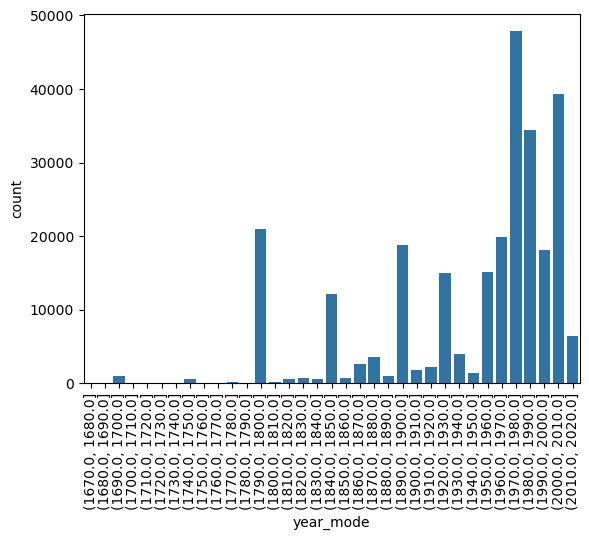

In [3]:
sns.countplot(x='year_mode', data=morphotopes, order=sorted(morphotopes["year_mode"].unique())  # alphabetical order
)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

In [10]:
pivot3 = tools.pivot_tbl(morphotopes,3)
pivot3.to_csv("tables/proportions3_fr.csv")

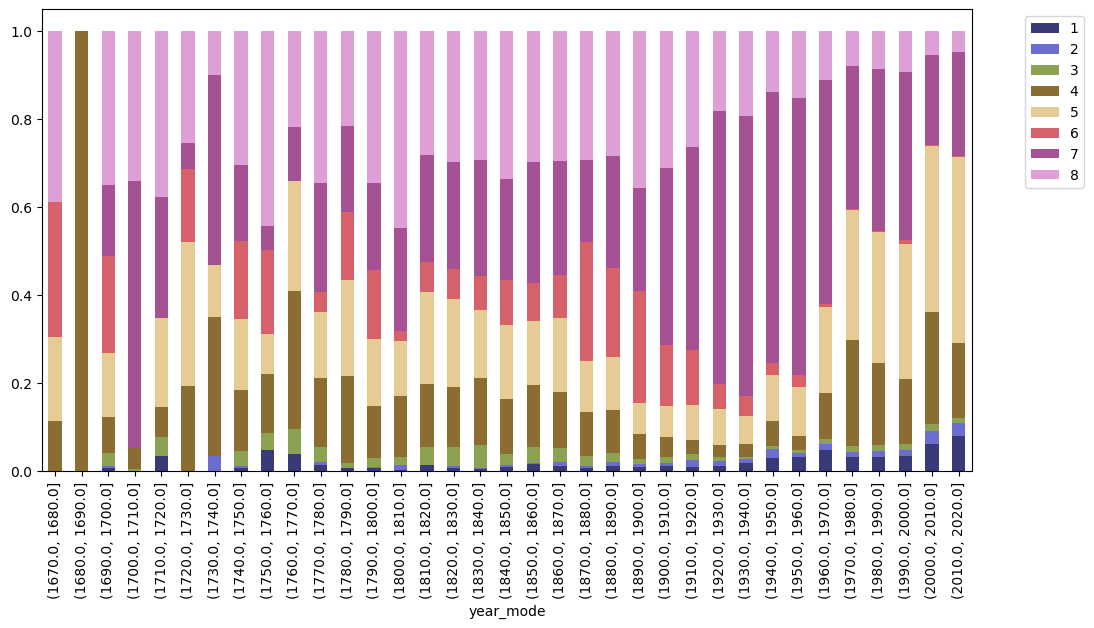

In [5]:
tools.hist(pivot3)

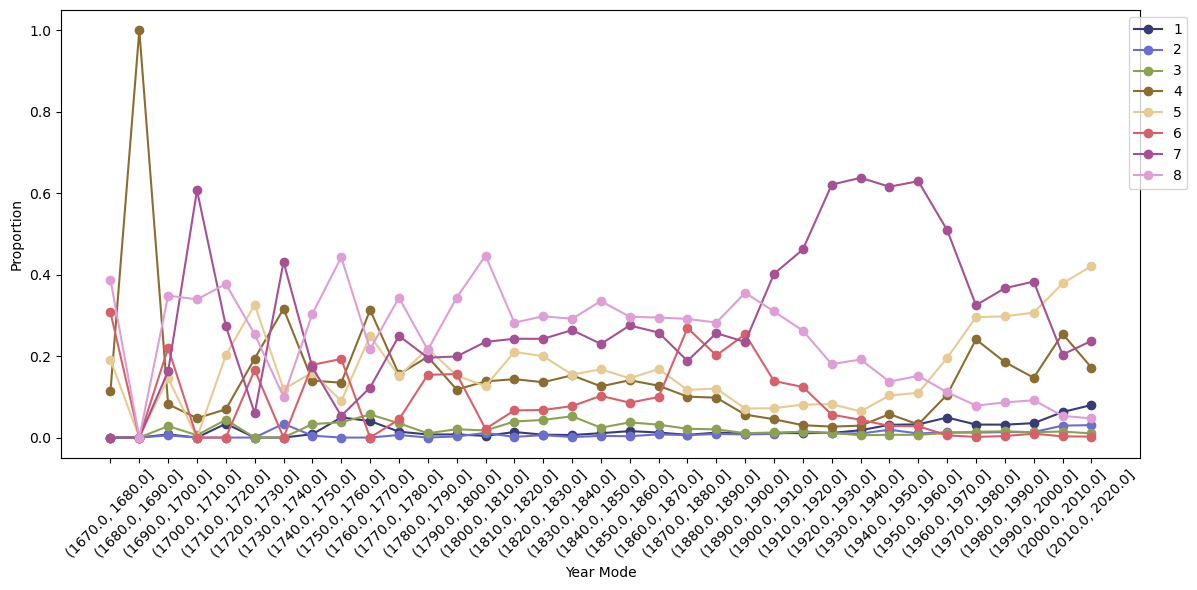

In [6]:
tools.line_plot(pivot3)

In [7]:
pivot3_cum = tools.pivot_tbl_cum(morphotopes,3)
pivot3_cum

level_3_label,1,2,3,4,5,6,7,8
year_mode,,,,,,,,
"(1670.0, 1680.0]",0.000000,0.000000,0.000000,0.113573,0.191136,0.307479,0.000000,0.387812
"(1680.0, 1690.0]",0.000000,0.000000,0.000000,0.225182,0.167070,0.268765,0.000000,0.338983
"(1690.0, 1700.0]",0.007698,0.005275,0.027866,0.082773,0.145861,0.220452,0.161526,0.348549
"(1700.0, 1710.0]",0.007675,0.005259,0.027800,0.082667,0.145423,0.219789,0.162865,0.348521
"(1710.0, 1720.0]",0.008057,0.005183,0.028032,0.082474,0.146242,0.216604,0.164472,0.348936
"(1720.0, 1730.0]",0.007982,0.005135,0.027770,0.083518,0.147930,0.216131,0.163491,0.348045
"(1730.0, 1740.0]",0.007908,0.005399,0.027514,0.085658,0.147660,0.214145,0.165951,0.345764
"(1740.0, 1750.0]",0.008035,0.005100,0.029485,0.104850,0.151946,0.201475,0.168184,0.330923
"(1750.0, 1760.0]",0.008905,0.004993,0.029653,0.105478,0.150635,0.201298,0.165767,0.333271


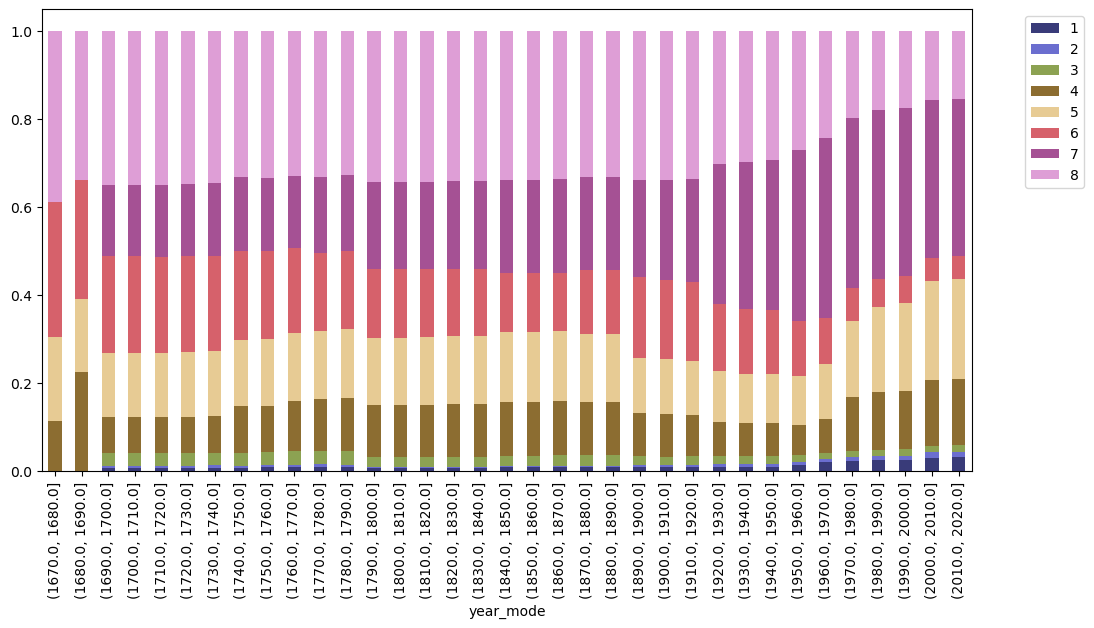

In [8]:
tools.hist(pivot3_cum)

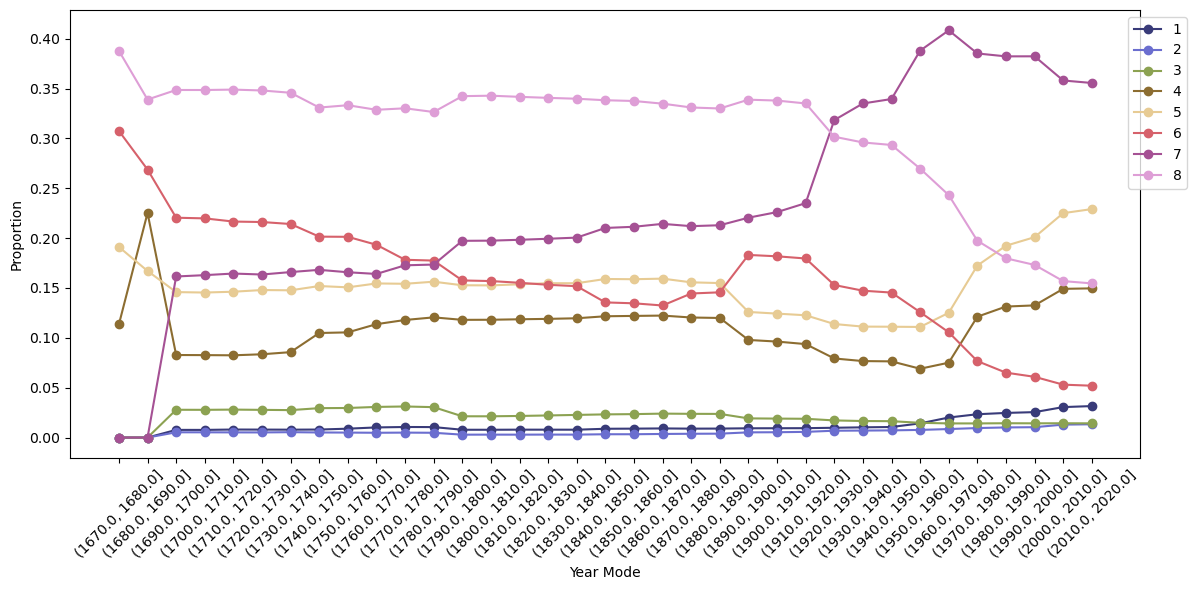

In [9]:
tools.line_plot(pivot3_cum)

In [3]:
nuts = gpd.read_file(
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/gpkg/NUTS_RG_01M_2024_3035.gpkg"
)

In [4]:
nuts1 = nuts[(nuts["CNTR_CODE"]=='FR') & (nuts["LEVL_CODE"]==1)]
nuts1

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
1677,FRC,1,FR,Bourgogne-Franche-Comté,Bourgogne-Franche-Comté,NaN,NaN,NaN,"POLYGON ((3832219.92 2830992.502, 3832953.317 ..."
1678,FRK,1,FR,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,NaN,NaN,NaN,"POLYGON ((3785951.88 2657239.289, 3786591.606 ..."
1679,FRF,1,FR,Grand Est,Grand Est,NaN,NaN,NaN,"MULTIPOLYGON (((3954303.652 3011643.819, 39541..."
1680,FRH,1,FR,Bretagne,Bretagne,NaN,NaN,NaN,"MULTIPOLYGON (((3356536.086 2945175.602, 33562..."
1681,FRI,1,FR,Nouvelle-Aquitaine,Nouvelle-Aquitaine,NaN,NaN,NaN,"MULTIPOLYGON (((3566670.039 2724045.961, 35674..."
1682,FRL,1,FR,Provence-Alpes-Côte d’Azur,Provence-Alpes-Côte d’Azur,NaN,NaN,NaN,"MULTIPOLYGON (((4026458.121 2453484.845, 40275..."
1683,FRG,1,FR,Pays de la Loire,Pays de la Loire,NaN,NaN,NaN,"MULTIPOLYGON (((3568903.123 2879717.979, 35689..."
1684,FRM,1,FR,Corse,Corse,NaN,NaN,NaN,"MULTIPOLYGON (((4274214.75 2211483.05, 4274524..."
1685,FR1,1,FR,Ile-de-France,Ile-de-France,NaN,NaN,NaN,"POLYGON ((3720530.95 2929882.842, 3721184.339 ..."
1686,FRJ,1,FR,Occitanie,Occitanie,NaN,NaN,NaN,"MULTIPOLYGON (((3655119.419 2473263.864, 36553..."


In [7]:
morphotopes_centr = morphotopes.copy()
morphotopes_centr["geometry"] = morphotopes_centr.geometry.centroid
morphotopes_centr.columns

Index(['geometry', 'initially_noise', 'level_1_label', 'level_2_label',
       'level_3_label', 'level_4_label', 'level_5_label', 'level_6_label',
       'level_7_label', 'num_buildings', 'year_mean', 'year_median',
       'year_min', 'year_q10', 'year_q90', 'year_max', 'year_std', 'year_mode',
       'sdbAre', 'sdbPer', 'sdbCoA', 'ssbCCo', 'ssbSqu', 'ssbERI', 'ssbElo',
       'libNCo', 'ldbPWL', 'ltcBuA', 'mtbAli', 'mtbNDi', 'ltbIBD', 'stbSAl',
       'sdsLen', 'sssLin', 'ldsMSL', 'ldsRea', 'ldsAre', 'sisBpM', 'sdsSPW',
       'sdsSPO', 'sdsSWD', 'lcdMes', 'linP3W', 'linP4W', 'linPDE', 'lcnClo',
       'lddNDe', 'linWID', 'ldsCDL', 'xcnSCl', 'mtdMDi', 'sddAre', 'midRea',
       'midAre', 'sdcLAL', 'sdcAre', 'sscCCo', 'sscERI', 'mtcWNe', 'mdcAre',
       'ltcWRB', 'sicCAR', 'sdsAre', 'mibCou', 'mibAre', 'mibLen', 'mibElo',
       'mibERI', 'mibCCo', 'mibLAL', 'mibFR', 'mibSCo', 'micBAD', 'midBAD',
       'limLPS', 'limAre'],
      dtype='object')

In [8]:
joined = morphotopes_centr.sjoin(nuts1, predicate="within")

In [18]:
joined

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,limAre,index_right,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
morphotope_id,,,,,,,,,,,,,,,,,,,,,
154261_8_36,POINT (1789578.638 949496.363),False,1,2,4,6,9,19,39,195,...,127882.778479,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_15,POINT (1791535.393 950318.026),False,1,2,5,8,12,24,49,337,...,4916.183878,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_43,POINT (1790914.079 950308.314),False,1,2,4,6,9,19,39,117,...,7038.301487,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_44,POINT (1790429.531 950102.94),False,1,2,5,8,12,23,47,88,...,11586.979732,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
154261_8_12,POINT (1790149.912 950261.925),False,2,4,7,12,18,40,75,139,...,2467.937565,1699,ES7,1,ES,Canarias,Canarias,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203563_3386_0,POINT (3188155.518 2296979.319),False,2,4,8,17,25,56,107,122,...,16195.180303,1694,ES1,1,ES,Noroeste,Noroeste,NaN,NaN,NaN
203563_3354_0,POINT (3191491.745 2296178.263),False,1,2,5,8,13,29,60,80,...,7156.151167,1694,ES1,1,ES,Noroeste,Noroeste,NaN,NaN,NaN
203563_3381_0,POINT (3185042.101 2293189.746),False,2,4,7,13,20,47,87,87,...,5635.600224,1694,ES1,1,ES,Noroeste,Noroeste,NaN,NaN,NaN


In [9]:
nuts_counts = (
    joined.pivot_table(
        index=["NUTS_NAME", "year_mode"],
        columns="level_3_label",
        values="num_buildings",
        aggfunc="sum",
        fill_value=0
    )
)
nuts_counts

level_3_label                                    1     2     3      4      5  \
NUTS_NAME                  year_mode                                           
Auvergne-Rhône-Alpes       (1690.0, 1700.0]     79    11    26    368    640   
                           (1710.0, 1720.0]      0     0     0      0      0   
                           (1730.0, 1740.0]      0     0     0     51      0   
                           (1740.0, 1750.0]     28     0     0    222    319   
                           (1750.0, 1760.0]      0     0     0     45     37   
...                                            ...   ...   ...    ...    ...   
Provence-Alpes-Côte d’Azur (1970.0, 1980.0]   7298  1749  6159  52344  51408   
                           (1980.0, 1990.0]   6126  3216  8467  43408  60089   
                           (1990.0, 2000.0]   3872  1834  4305  19593  34797   
                           (2000.0, 2010.0]  10522  4051  4443  32903  48890   
                           (2010.0, 2020.0]   1611   729   470   4107   9402   

level_3_label                                   6      7      8  
NUTS_NAME                  year_mode                             
Auvergne-Rhône-Alpes       (1690.0, 1700.0]  1168    591   1165  
                           (1710.0, 1720.0]     0     37      0  
                           (1730.0, 1740.0]     0      0      0  
                           (1740.0, 1750.0]   295    315    557  
                           (1750.0, 1760.0]    55     70    170  
...                                           ...    ...    ...  
Provence-Alpes-Côte d’Azur (1970.0, 1980.0]   396  63254  22521  
                           (1980.0, 1990.0]    52  86800  26760  
                           (1990.0, 2000.0]   333  43600  13569  
                           (2000.0, 2010.0]   127  31440  12393  
                           (2010.0, 2020.0]     0   4007   1997  

[400 rows x 8 columns]

In [10]:
nuts_counts = nuts_counts.reset_index()
nuts_counts

level_3_label,NUTS_NAME,year_mode,1,2,3,4,5,6,7,8
0,Auvergne-Rhône-Alpes,"(1690.0, 1700.0]",79,11,26,368,640,1168,591,1165
1,Auvergne-Rhône-Alpes,"(1710.0, 1720.0]",0,0,0,0,0,0,37,0
2,Auvergne-Rhône-Alpes,"(1730.0, 1740.0]",0,0,0,51,0,0,0,0
3,Auvergne-Rhône-Alpes,"(1740.0, 1750.0]",28,0,0,222,319,295,315,557
4,Auvergne-Rhône-Alpes,"(1750.0, 1760.0]",0,0,0,45,37,55,70,170
...,...,...,...,...,...,...,...,...,...,...
395,Provence-Alpes-Côte d’Azur,"(1970.0, 1980.0]",7298,1749,6159,52344,51408,396,63254,22521
396,Provence-Alpes-Côte d’Azur,"(1980.0, 1990.0]",6126,3216,8467,43408,60089,52,86800,26760
397,Provence-Alpes-Côte d’Azur,"(1990.0, 2000.0]",3872,1834,4305,19593,34797,333,43600,13569
398,Provence-Alpes-Côte d’Azur,"(2000.0, 2010.0]",10522,4051,4443,32903,48890,127,31440,12393


In [11]:
agg_cols = [i for i in range(1, 9)]

nuts_counts['total_count'] = nuts_counts[agg_cols].sum(axis=1)
for col in agg_cols:
    nuts_counts[f'{col}_pct'] = nuts_counts[col] / nuts_counts['total_count']

nuts_counts

level_3_label,NUTS_NAME,year_mode,1,2,3,4,5,6,7,8,total_count,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct
0,Auvergne-Rhône-Alpes,"(1690.0, 1700.0]",79,11,26,368,640,1168,591,1165,4048,0.019516,0.002717,0.006423,0.090909,0.158103,0.288538,0.145998,0.287796
1,Auvergne-Rhône-Alpes,"(1710.0, 1720.0]",0,0,0,0,0,0,37,0,37,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,Auvergne-Rhône-Alpes,"(1730.0, 1740.0]",0,0,0,51,0,0,0,0,51,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,Auvergne-Rhône-Alpes,"(1740.0, 1750.0]",28,0,0,222,319,295,315,557,1736,0.016129,0.000000,0.000000,0.127880,0.183756,0.169931,0.181452,0.320853
4,Auvergne-Rhône-Alpes,"(1750.0, 1760.0]",0,0,0,45,37,55,70,170,377,0.000000,0.000000,0.000000,0.119363,0.098143,0.145889,0.185676,0.450928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Provence-Alpes-Côte d’Azur,"(1970.0, 1980.0]",7298,1749,6159,52344,51408,396,63254,22521,205129,0.035578,0.008526,0.030025,0.255176,0.250613,0.001930,0.308362,0.109789
396,Provence-Alpes-Côte d’Azur,"(1980.0, 1990.0]",6126,3216,8467,43408,60089,52,86800,26760,234918,0.026077,0.013690,0.036042,0.184779,0.255787,0.000221,0.369491,0.113912
397,Provence-Alpes-Côte d’Azur,"(1990.0, 2000.0]",3872,1834,4305,19593,34797,333,43600,13569,121903,0.031763,0.015045,0.035315,0.160726,0.285448,0.002732,0.357661,0.111310
398,Provence-Alpes-Côte d’Azur,"(2000.0, 2010.0]",10522,4051,4443,32903,48890,127,31440,12393,144769,0.072681,0.027983,0.030690,0.227279,0.337710,0.000877,0.217174,0.085605


In [12]:
type_names = {
    "1": "Incoherent Large-Scale Homogeneous Fabric",
    "2": "Incoherent Large-Scale Heterogeneous Fabric",
    "3": "Incoherent Small-Scale Linear Fabric",
    "4": "Incoherent Small-Scale Sparse Fabric",
    "5": "Incoherent Small-Scale Compact Fabric",
    "6": "Coherent Interconnected Fabric",
    "7": "Coherent Dense Disjoint Fabric",
    "8": "Coherent Dense Adjacent Fabric"
}


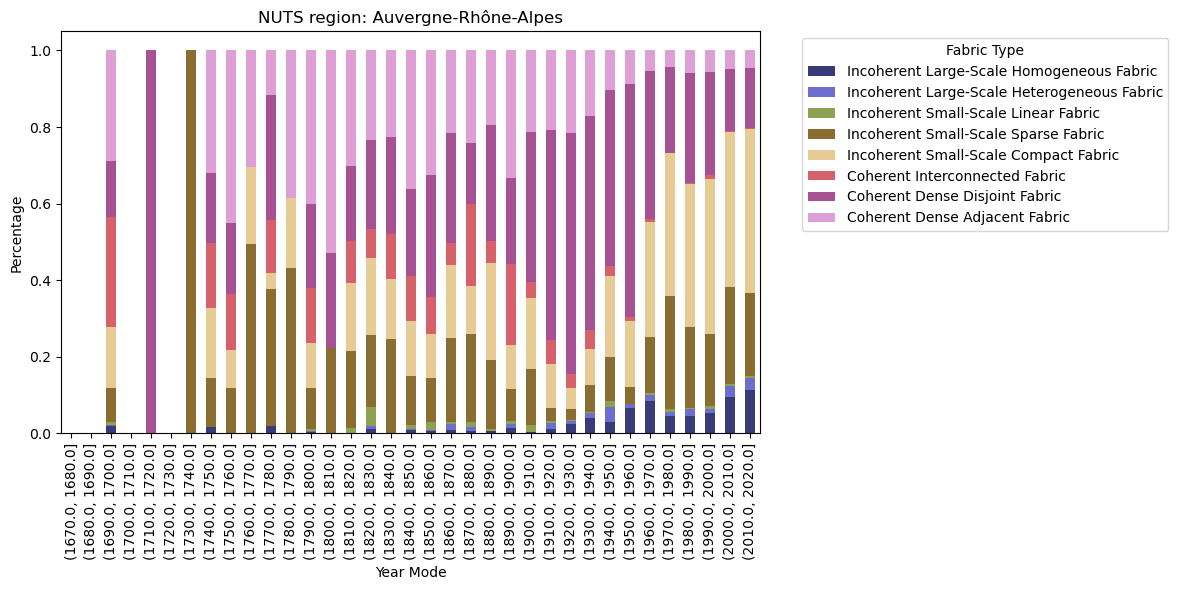

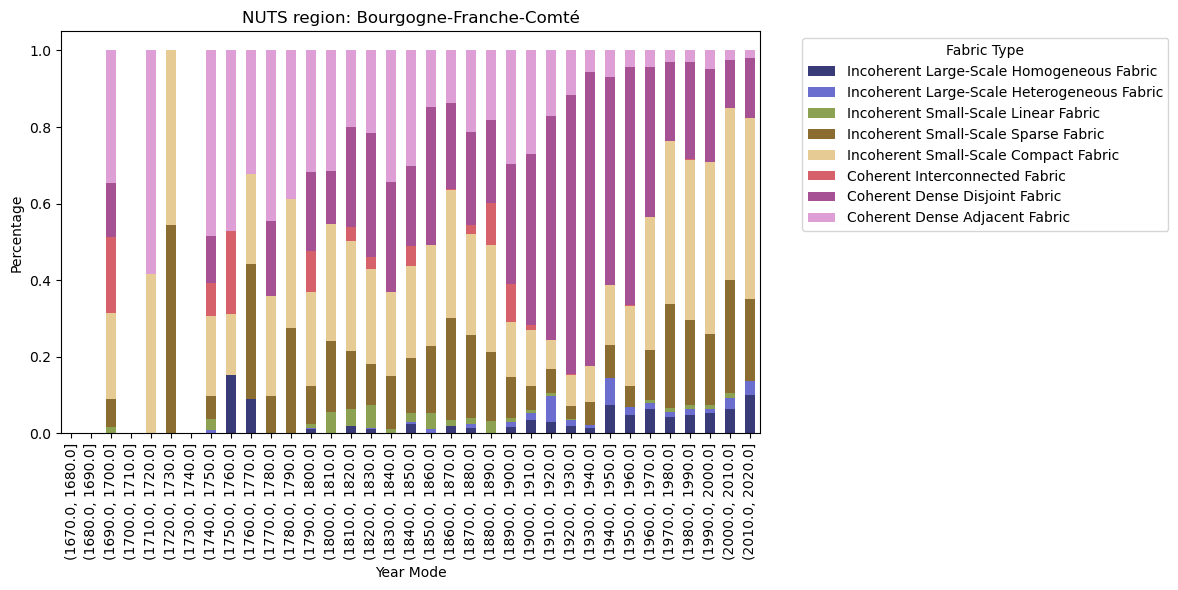

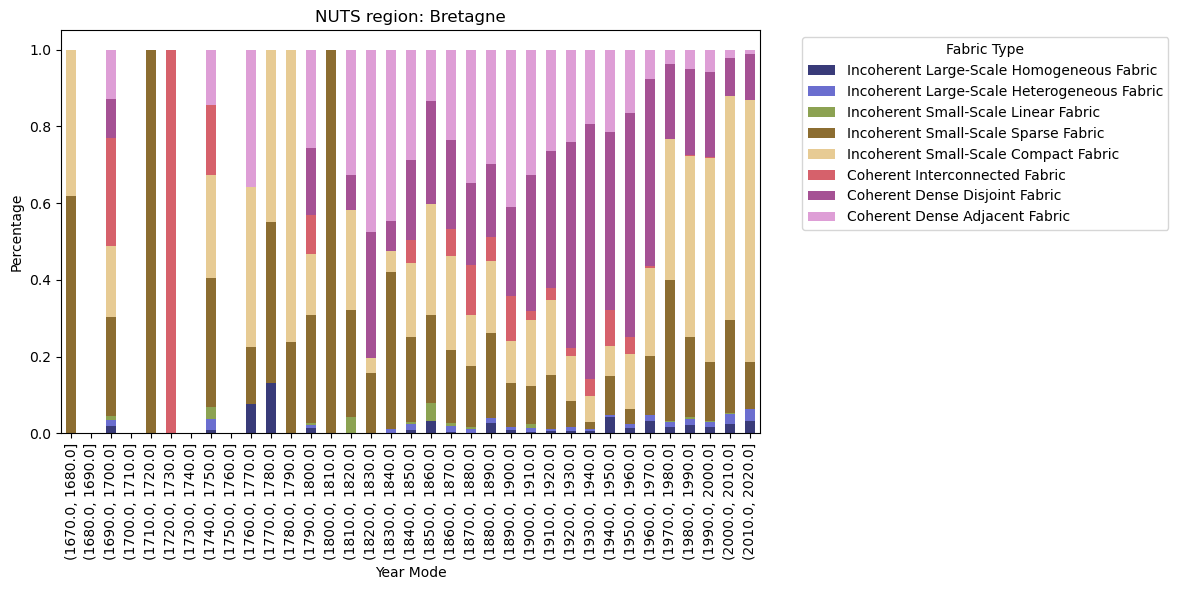

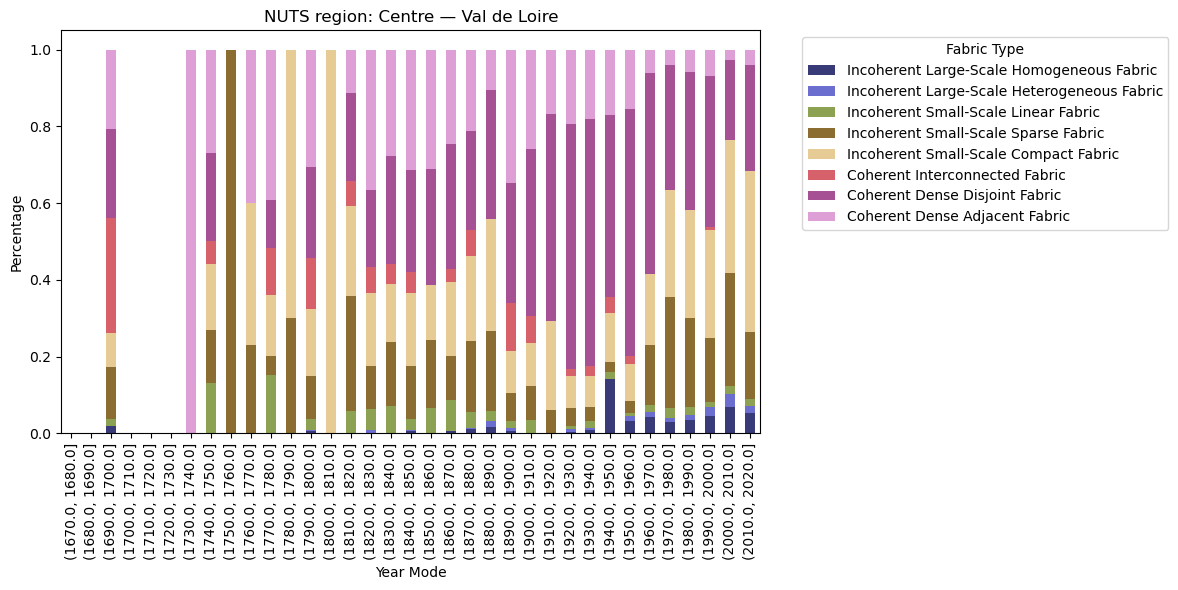

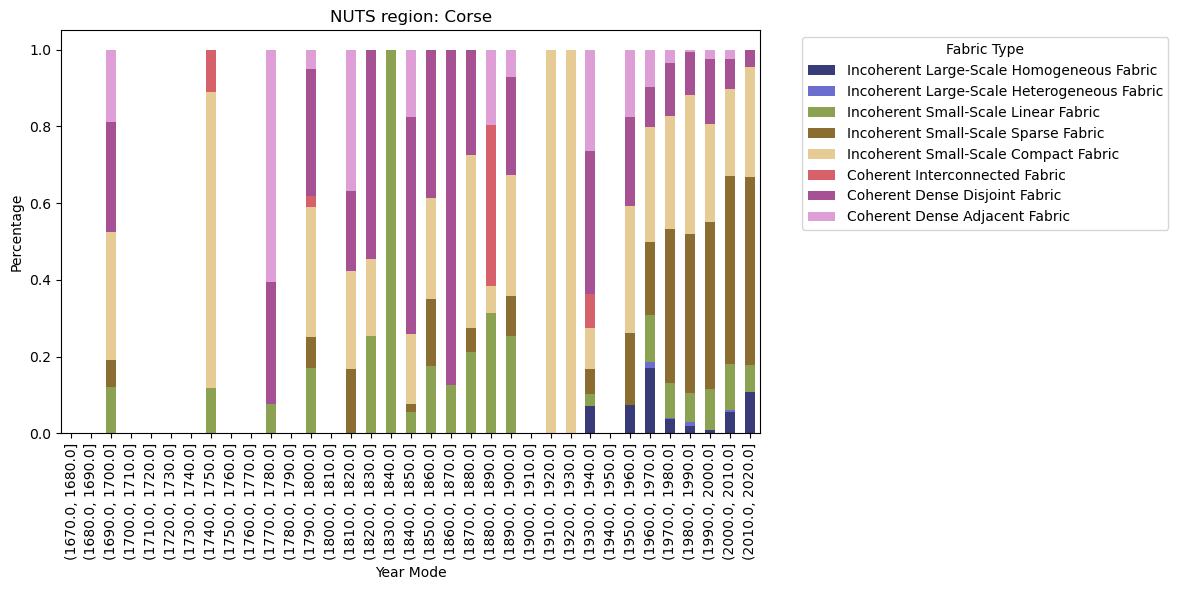

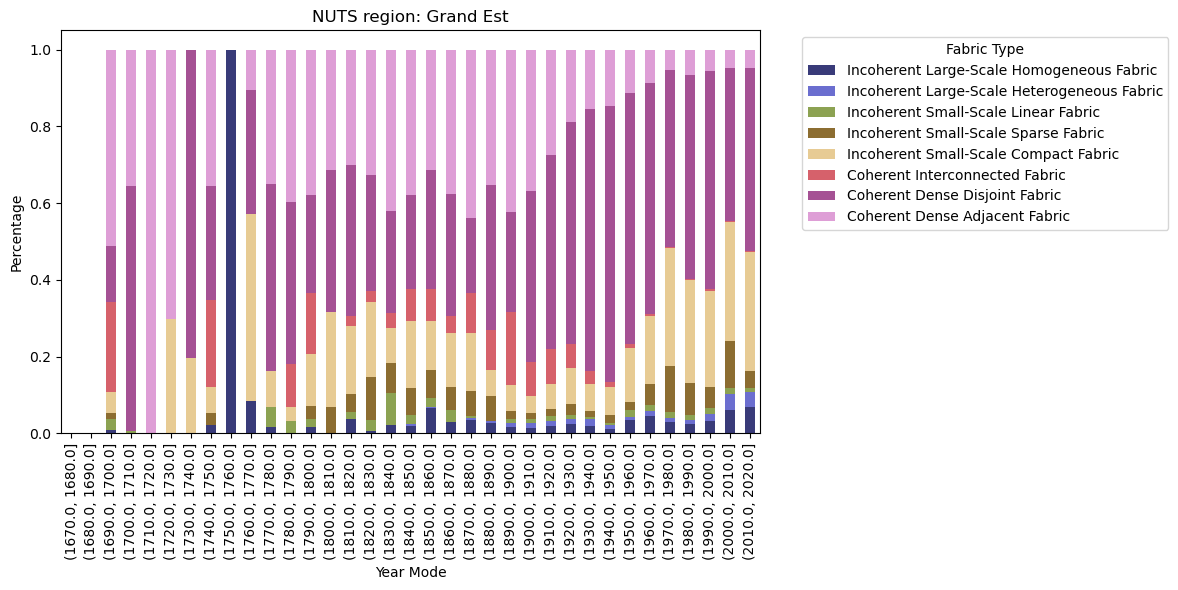

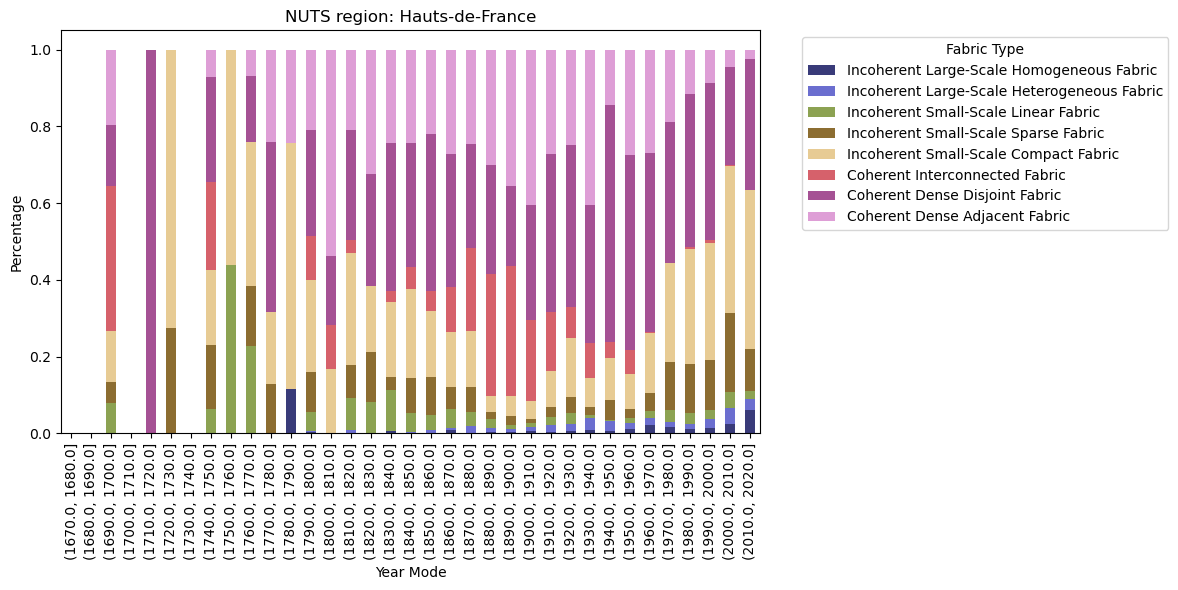

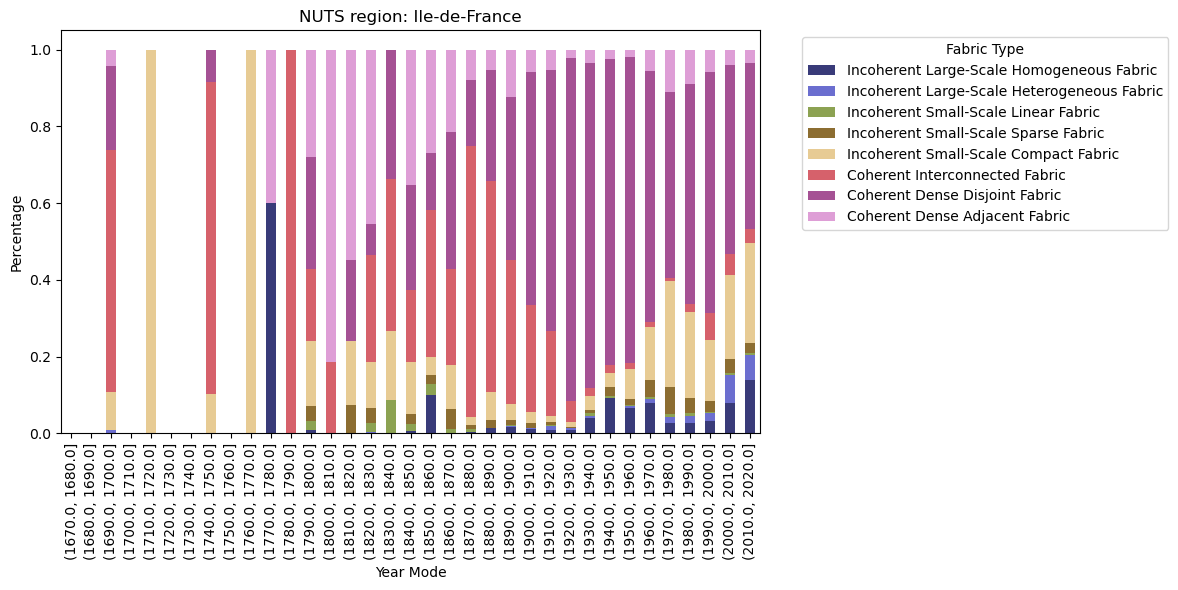

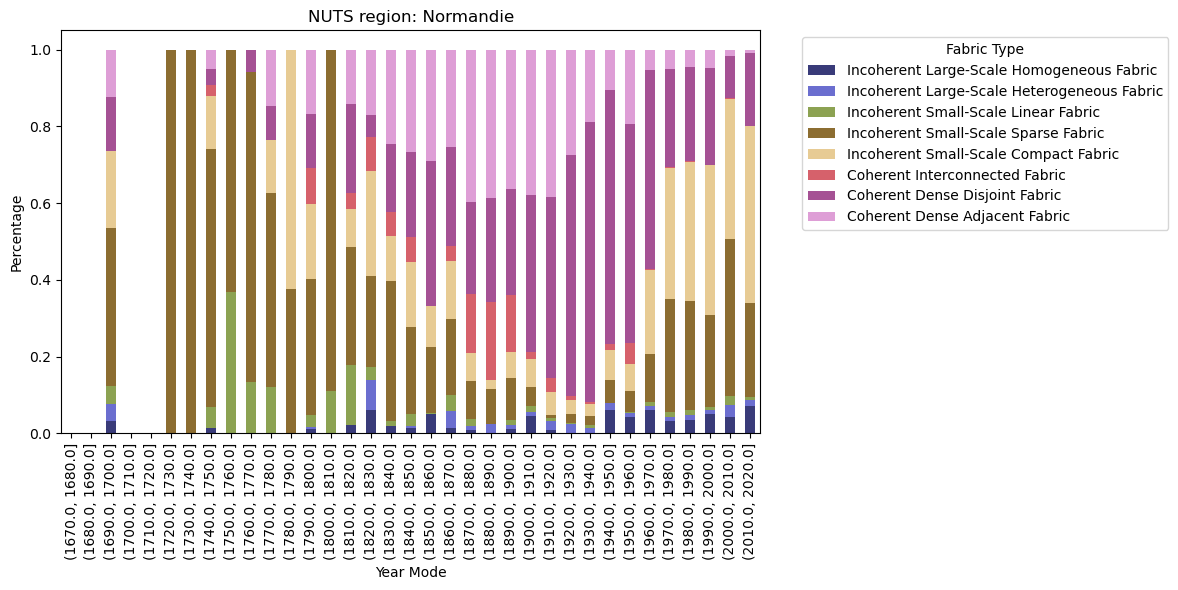

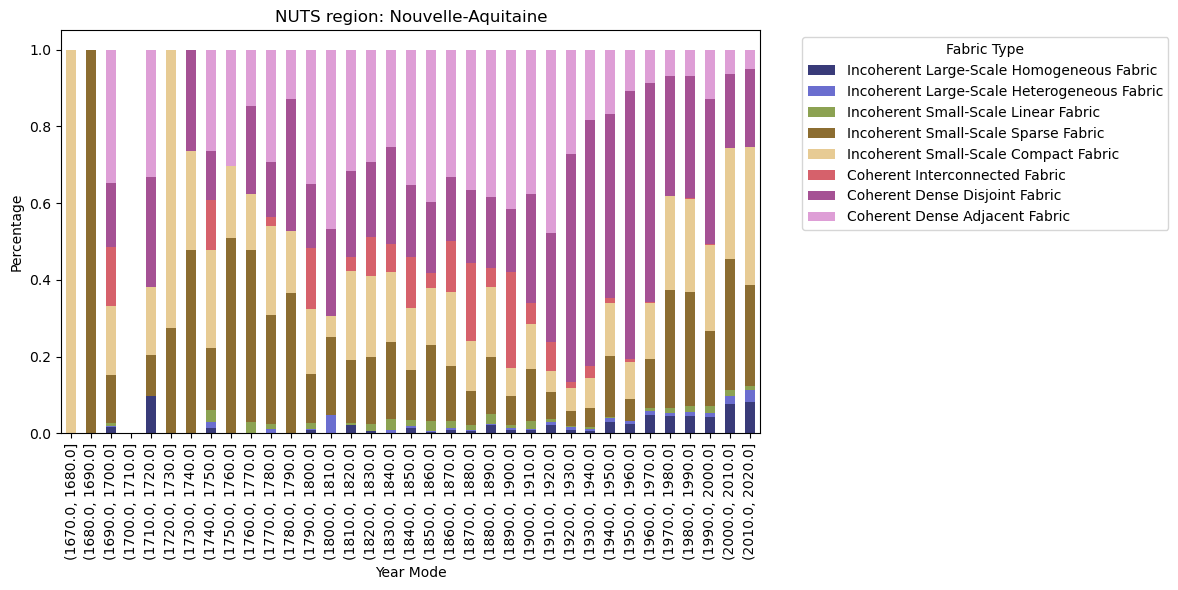

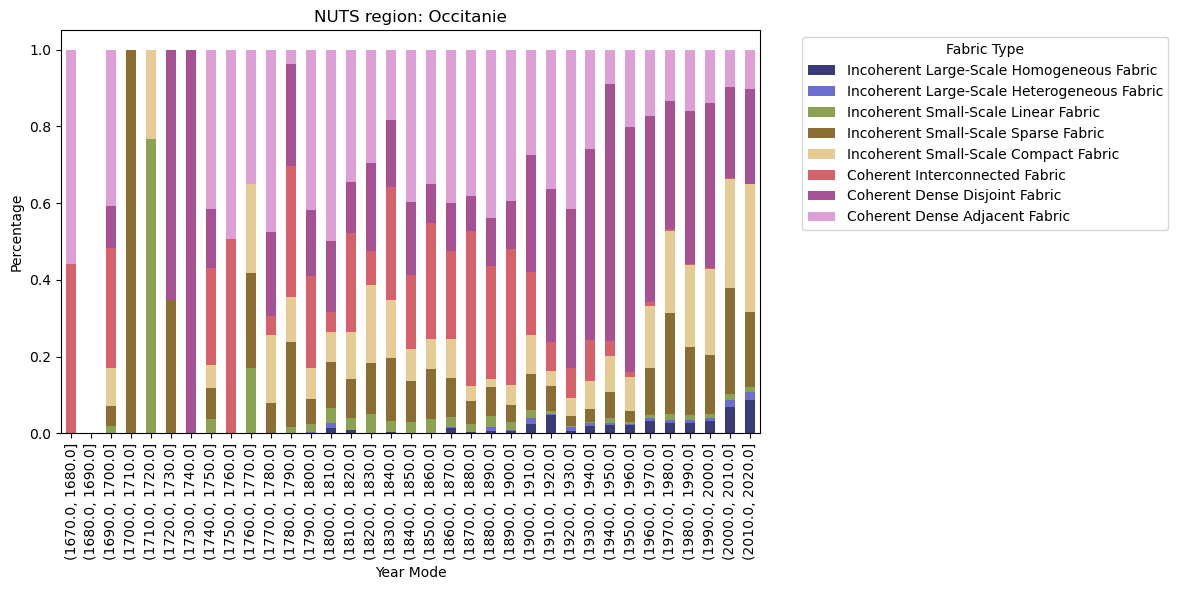

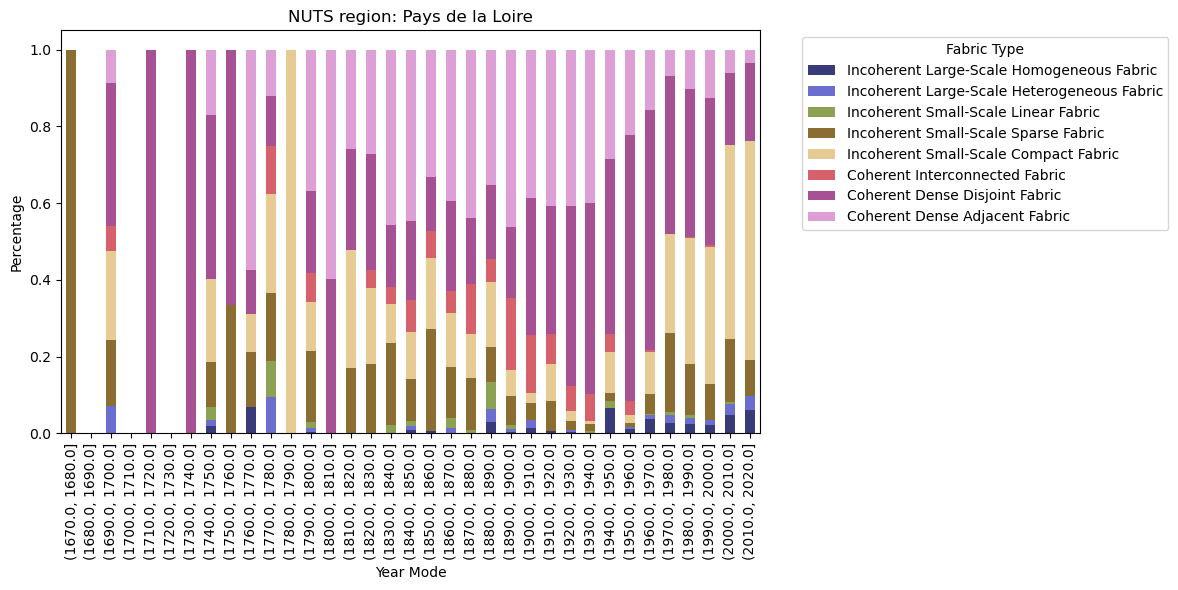

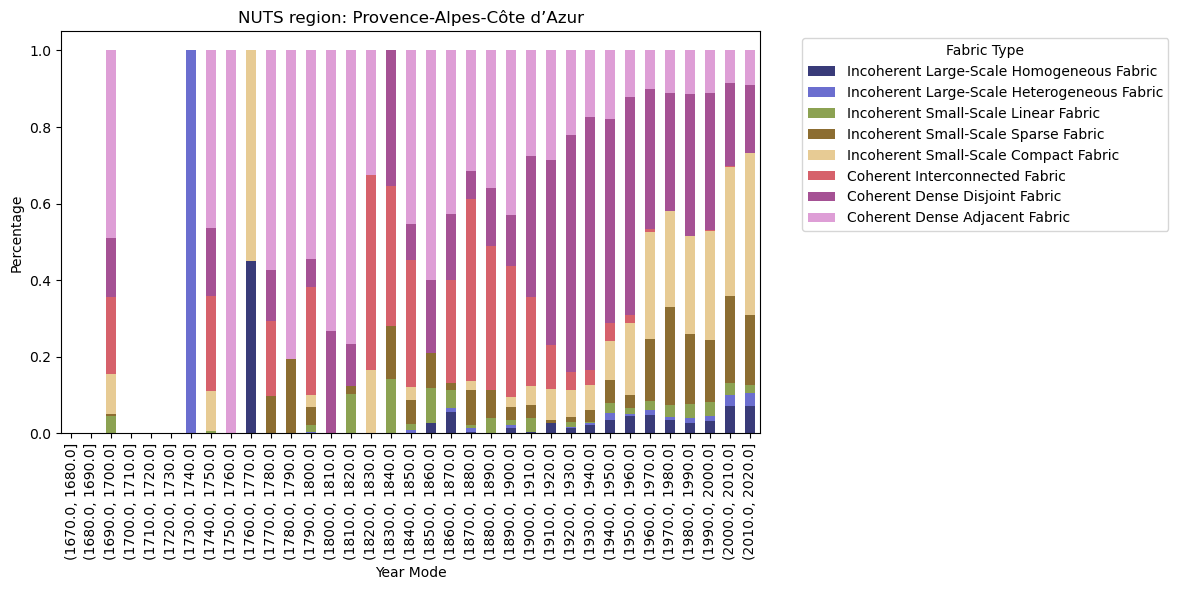

In [14]:
# Percentage columns
pct_cols = ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct']

# All possible year_mode values
all_year_modes = sorted(nuts_counts['year_mode'].unique())

# Unique NUTS regions
nuts_list = nuts_counts['NUTS_NAME'].unique()

for nut in nuts_list:
    df_nut = nuts_counts[nuts_counts['NUTS_NAME'] == nut].copy()
    
    # Ensure all year_mode bins exist, fill missing with zeros
    df_nut = df_nut.set_index('year_mode').reindex(all_year_modes, fill_value=0)
    
    # Plot stacked bar chart
    ax = df_nut[pct_cols].plot(
        kind='bar',
        stacked=True,
        figsize=(12,6),
        colormap='tab20b'
    )
    
    ax.set_title(f"NUTS region: {nut}")
    ax.set_ylabel("Percentage")
    ax.set_xlabel("Year Mode")
    
    # Rename legend using type_names
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, [type_names[col.replace('_pct','')] for col in pct_cols],
              bbox_to_anchor=(1.05, 1), loc='upper left', title="Fabric Type")
    
    plt.tight_layout()